### Final Project Submission

Please fill out:
* Student name: Cristina Townsend
* Student pace: part time
* Scheduled project review date/time: Tuesday 5 Jan 2021
* Instructor name: Yish 
* Presentation URL: https://docs.google.com/presentation/d/1RH0kNuGHBP1QfHLB5sRwwK_6bF__H9xjzLe3WBvK7-I/edit#slide=id.gb36abeb427_0_17


### Business Case

Using the City of Chicago Traffic Crashes dataframe, we are going to model the data to try to answer the following questions:

- Primary causes of car crashes in the Chicago Area
- Main types of car crashes
- What can drivers do to prevent crashes?

Focus in this analysis:
- Use a model to predict whether the main cause of crash was driver’s failure to yield


## Obtain the Data
Inputting and initial look at the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import pandas and data set
import pandas as pd
crash_df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
people_df = pd.read_csv('Traffic_Crashes_-_People.csv')

In [3]:
# merge the two datasets into one
crash_df = pd.merge(crash_df, people_df, on='CRASH_RECORD_ID', how='left')

In [4]:
# preview, make sure everything loaded and merge correctly
crash_df.head()

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,JB460108,NaN,10/02/2018 06:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [5]:
# A quick preview of the data
display(crash_df.info())
crash_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983415 entries, 0 to 983414
Data columns (total 78 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                983415 non-null  object 
 1   RD_NO_x                        975129 non-null  object 
 2   CRASH_DATE_EST_I               55419 non-null   object 
 3   CRASH_DATE_x                   983415 non-null  object 
 4   POSTED_SPEED_LIMIT             983415 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         983415 non-null  object 
 6   DEVICE_CONDITION               983415 non-null  object 
 7   WEATHER_CONDITION              983415 non-null  object 
 8   LIGHTING_CONDITION             983415 non-null  object 
 9   FIRST_CRASH_TYPE               983415 non-null  object 
 10  TRAFFICWAY_TYPE                983415 non-null  object 
 11  LANE_CNT                       446675 non-null  float64
 12  ALIGNMENT                     

None

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,983415.000000,4.466750e+05,983415.000000,983403.00000,983415.000000,982542.000000,982542.000000,982542.000000,982542.000000,982542.000000,...,982542.0,983415.000000,983415.000000,983415.000000,977913.000000,977913.000000,962876.000000,202307.000000,704186.000000,1254.000000
mean,28.741908,9.607545e+00,3565.721645,1233.62487,2.082788,0.261514,0.001354,0.026519,0.143412,0.090229,...,0.0,13.442261,4.143026,6.682120,41.854403,-87.669046,458473.295061,4.191481,37.911975,0.167759
std,6.119038,2.153298e+03,2893.048010,706.24503,0.457262,0.771388,0.042685,0.206621,0.573795,0.433751,...,0.0,5.368752,1.980408,3.380636,0.427441,0.879594,263026.125033,2.189786,17.132989,0.099854
min,0.000000,0.000000e+00,0.000000,111.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014,2.000000,1.000000,-177.000000,0.000000
25%,30.000000,2.000000e+00,1148.500000,712.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,10.000000,2.000000,4.000000,41.786005,-87.720835,231895.000000,3.000000,25.000000,0.120000
50%,30.000000,2.000000e+00,3100.000000,1212.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,14.000000,4.000000,7.000000,41.876413,-87.672286,458911.500000,3.000000,36.000000,0.170000
75%,30.000000,4.000000e+00,5500.000000,1822.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,17.000000,6.000000,10.000000,41.923434,-87.632495,685512.000000,6.000000,50.000000,0.210000
max,99.000000,1.191625e+06,451100.000000,6100.00000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,...,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,964247.000000,12.000000,110.000000,1.000000


### Column Names and Descriptions

**POSTED_SPEED_LIMIT**	
Posted speed limit, as determined by reporting officer

**WEATHER_CONDITION**	
Weather condition at time of crash, as determined by reporting officer

**LIGHTING_CONDITION**	
Light condition at time of crash, as determined by reporting officer

**FIRST_CRASH_TYPE**	
Type of first collision in crash

**TRAFFICWAY_TYPE**	
Trafficway type, as determined by reporting officer

**LANE_CNT**	
Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)

**ALIGNMENT**	
Street alignment at crash location, as determined by reporting officer

**ROADWAY_SURFACE_COND**	
Road surface condition, as determined by reporting officer

**ROAD_DEFECT**	
Road defects, as determined by reporting officer

**CRASH_TYPE**	
A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

**INTERSECTION_RELATED_I**	
A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection.

**NOT_RIGHT_OF_WAY_I**	
Whether the crash begun or first contact was made outside of the public right-of-way.

**HIT_AND_RUN_I**
Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid

**DAMAGE**	
A field observation of estimated damage.

**PRIM_CONTRIBUTORY_CAUSE**	
The factor which was most significant in causing the crash, as determined by officer judgment

**SEC_CONTRIBUTORY_CAUSE**	
The factor which was second most significant in causing the crash, as determined by officer judgment

**BEAT_OF_OCCURRENCE**	
Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74

**STATEMENTS_TAKEN_I**	
Whether statements were taken from unit(s) involved in crash

**WORK_ZONE_TYPE**	
The type of work zone, if any

**NUM_UNITS**	
Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or another non-passenger roadway user. Each unit represents a mode of traffic with an independent trajectory.

**CRASH_HOUR**	
The hour of the day component of CRASH_DATE.

**CRASH_DAY_OF_WEEK**	
The day of the week component of CRASH_DATE. Sunday=1

**CRASH_MONTH**	
The month component of CRASH_DATE.

**SEX**	
Gender of person involved in crash, as determined by reporting officer

**AGE**	
Age of person involved in crash

**AIRBAG_DEPLOYED**	
Whether vehicle occupant airbag deployed as result of crash

**EJECTION**	
Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash

**INJURY_CLASSIFICATION**	
Severity of injury person sustained in the crash

**DRIVER_ACTION**	
Driver action that contributed to the crash, as determined by reporting officer

**DRIVER_VISION**	
What, if any, objects obscured the driver’s vision at time of crash

**PHYSICAL_CONDITION**	
Driver’s apparent physical condition at time of crash, as observed by the reporting officer

**PEDPEDAL_VISIBILITY**	
Visibility of pedestrian of cyclist safety equipment in use at time of crash

**BAC_RESULT**	
Status of blood alcohol concentration testing for driver or other person involved in crash

**BAC_RESULT VALUE**	
Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results)

**CELL_PHONE_USE**	
Whether person was/was not using cellphone at the time of the crash, as determined by the reporting officer

## Scrubbing and exploring the data

In [6]:
# Remove duplicate crashes based on crash_ID
crash_df.drop_duplicates(subset=['CRASH_RECORD_ID'], keep = 'first', inplace = True)
crash_df.shape

(442956, 78)

In [7]:
# Create list of columns to drop
drop_col = ['CRASH_DATE_EST_I','PHOTOS_TAKEN_I', 'DOORING_I',  
            'WORK_ZONE_I', 'WORKERS_PRESENT_I','LOCATION', 'RD_NO_x', 'RD_NO_y',
            'REPORT_TYPE','CITY', 'STATE', 'EMS_AGENCY', 'ZIPCODE', 
            'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'EMS_RUN_NO',
            'PERSON_ID', 'HOSPITAL','VEHICLE_ID', 'CRASH_RECORD_ID', 'CRASH_DATE_x',
            'CRASH_DATE_y', 'CRASH_DATE_EST_I', 'DATE_POLICE_NOTIFIED', 'LATITUDE',
            'LONGITUDE', 'STREET_DIRECTION', 'STREET_NAME', 'SEAT_NO', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 
            'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
            'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'DAMAGE', 
            'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'PEDPEDAL_ACTION',
            'PEDPEDAL_LOCATION', 'SAFETY_EQUIPMENT', 'PERSON_TYPE', 
            'PHYSICAL_CONDITION', 'MOST_SEVERE_INJURY', 'STREET_NO']

In [8]:
# Drop those columns
crash_df.drop(drop_col, axis=1, inplace=True)

In [9]:
# Check
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442956 entries, 0 to 983409
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       442956 non-null  int64  
 1   WEATHER_CONDITION        442956 non-null  object 
 2   LIGHTING_CONDITION       442956 non-null  object 
 3   FIRST_CRASH_TYPE         442956 non-null  object 
 4   TRAFFICWAY_TYPE          442956 non-null  object 
 5   LANE_CNT                 198959 non-null  float64
 6   ALIGNMENT                442956 non-null  object 
 7   ROADWAY_SURFACE_COND     442956 non-null  object 
 8   ROAD_DEFECT              442956 non-null  object 
 9   CRASH_TYPE               442956 non-null  object 
 10  INTERSECTION_RELATED_I   99485 non-null   object 
 11  NOT_RIGHT_OF_WAY_I       20744 non-null   object 
 12  HIT_AND_RUN_I            127432 non-null  object 
 13  PRIM_CONTRIBUTORY_CAUSE  442956 non-null  object 
 14  SEC_

### Object null Values

In [10]:
#Create List of object columns
object_col = list(crash_df.select_dtypes(include=['object']).columns)
object_col

['WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STATEMENTS_TAKEN_I',
 'WORK_ZONE_TYPE',
 'SEX',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PEDPEDAL_VISIBILITY',
 'BAC_RESULT',
 'CELL_PHONE_USE']

Pull unique values in each column of object_col.
This will help us know how we should fill or drop the null values.

In [11]:
for col in object_col:
    unique = crash_df[col].unique()
    print(f'{col}: {unique}\n')

WEATHER_CONDITION: ['CLEAR' 'RAIN' 'CLOUDY/OVERCAST' 'UNKNOWN' 'SNOW' 'SLEET/HAIL'
 'FOG/SMOKE/HAZE' 'FREEZING RAIN/DRIZZLE' 'SEVERE CROSS WIND GATE' 'OTHER'
 'BLOWING SNOW' 'BLOWING SAND, SOIL, DIRT']

LIGHTING_CONDITION: ['DARKNESS' 'DAYLIGHT' 'DARKNESS, LIGHTED ROAD' 'DAWN' 'DUSK' 'UNKNOWN']

FIRST_CRASH_TYPE: ['PARKED MOTOR VEHICLE' 'SIDESWIPE SAME DIRECTION' 'TURNING' 'REAR END'
 'ANGLE' 'OTHER OBJECT' 'PEDESTRIAN' 'FIXED OBJECT'
 'SIDESWIPE OPPOSITE DIRECTION' 'PEDALCYCLIST' 'HEAD ON' 'REAR TO REAR'
 'REAR TO FRONT' 'REAR TO SIDE' 'OTHER NONCOLLISION' 'OVERTURNED' 'ANIMAL'
 'TRAIN']

TRAFFICWAY_TYPE: ['OTHER' 'ONE-WAY' 'NOT DIVIDED' 'T-INTERSECTION'
 'DIVIDED - W/MEDIAN BARRIER' 'PARKING LOT'
 'DIVIDED - W/MEDIAN (NOT RAISED)' 'FOUR WAY' 'UNKNOWN' 'CENTER TURN LANE'
 'RAMP' 'ALLEY' 'FIVE POINT, OR MORE' 'DRIVEWAY' 'Y-INTERSECTION'
 'UNKNOWN INTERSECTION TYPE' 'NOT REPORTED' 'TRAFFIC ROUTE'
 'L-INTERSECTION' 'ROUNDABOUT']

ALIGNMENT: ['STRAIGHT AND LEVEL' 'CURVE ON GRADE' 'STRAIGH

In [12]:
# Check the number of unique values in each object column
for col in object_col:
    unique_ = crash_df[col].nunique()
    print(f'{col}: {unique_}')

WEATHER_CONDITION: 12
LIGHTING_CONDITION: 6
FIRST_CRASH_TYPE: 18
TRAFFICWAY_TYPE: 20
ALIGNMENT: 6
ROADWAY_SURFACE_COND: 7
ROAD_DEFECT: 7
CRASH_TYPE: 2
INTERSECTION_RELATED_I: 2
NOT_RIGHT_OF_WAY_I: 2
HIT_AND_RUN_I: 2
PRIM_CONTRIBUTORY_CAUSE: 40
SEC_CONTRIBUTORY_CAUSE: 40
STATEMENTS_TAKEN_I: 2
WORK_ZONE_TYPE: 4
SEX: 3
AIRBAG_DEPLOYED: 7
EJECTION: 5
INJURY_CLASSIFICATION: 5
DRIVER_ACTION: 20
DRIVER_VISION: 14
PEDPEDAL_VISIBILITY: 4
BAC_RESULT: 4
CELL_PHONE_USE: 2


In [13]:
# Check for nulls in object_col
for col in object_col:
    nulls = crash_df[col].isna().sum()
    print(f'{col}: {nulls}')

WEATHER_CONDITION: 0
LIGHTING_CONDITION: 0
FIRST_CRASH_TYPE: 0
TRAFFICWAY_TYPE: 0
ALIGNMENT: 0
ROADWAY_SURFACE_COND: 0
ROAD_DEFECT: 0
CRASH_TYPE: 0
INTERSECTION_RELATED_I: 343471
NOT_RIGHT_OF_WAY_I: 422212
HIT_AND_RUN_I: 315524
PRIM_CONTRIBUTORY_CAUSE: 0
SEC_CONTRIBUTORY_CAUSE: 0
STATEMENTS_TAKEN_I: 433996
WORK_ZONE_TYPE: 440622
SEX: 1851
AIRBAG_DEPLOYED: 4995
EJECTION: 2637
INJURY_CLASSIFICATION: 1076
DRIVER_ACTION: 10200
DRIVER_VISION: 10258
PEDPEDAL_VISIBILITY: 438964
BAC_RESULT: 9990
CELL_PHONE_USE: 442115


Now that we have an idea of the null values in each column, we can start dealing with the null values.

In [14]:
# Fill nulls with "UNKNOWN"
fill_na = ['WORK_ZONE_TYPE', 'DRIVER_ACTION','DRIVER_VISION', 'PEDPEDAL_VISIBILITY',
          'INJURY_CLASSIFICATION']

for col in fill_na:
    crash_df[col].fillna('UNKNOWN', inplace = True) 
    is_na = crash_df[col].isna().sum()
    print(f'{col}: {is_na}')

WORK_ZONE_TYPE: 0
DRIVER_ACTION: 0
DRIVER_VISION: 0
PEDPEDAL_VISIBILITY: 0
INJURY_CLASSIFICATION: 0


In [15]:
# List columns to fill nan with N
fill_na_n = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
             'STATEMENTS_TAKEN_I', 'CELL_PHONE_USE']

# For loop to replace nan in object_col with N
for col in fill_na_n:
    crash_df[col].fillna('N', inplace = True) 
    is_na = crash_df[col].isna().sum()
    print(f'{col}: {is_na}')

INTERSECTION_RELATED_I: 0
NOT_RIGHT_OF_WAY_I: 0
HIT_AND_RUN_I: 0
STATEMENTS_TAKEN_I: 0
CELL_PHONE_USE: 0


In [16]:
# Fill sex null with X
crash_df['SEX'].fillna('X', inplace = True) 
crash_df['SEX'].unique()

array(['M', 'F', 'X'], dtype=object)

In [17]:
# Fill bac results
crash_df['BAC_RESULT'].fillna('TEST NOT OFFERED', inplace = True) 
crash_df['BAC_RESULT'].unique()

array(['TEST NOT OFFERED', 'TEST REFUSED', 'TEST TAKEN',
       'TEST PERFORMED, RESULTS UNKNOWN'], dtype=object)

In [18]:
# Fill Ejection null
crash_df['EJECTION'].fillna('NONE', inplace = True) 
crash_df['EJECTION'].unique()

array(['NONE', 'UNKNOWN', 'TOTALLY EJECTED', 'PARTIALLY EJECTED',
       'TRAPPED/EXTRICATED'], dtype=object)

In [19]:
crash_df['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace = True) 
crash_df['AIRBAG_DEPLOYED'].unique()

array(['DID NOT DEPLOY', 'DEPLOYMENT UNKNOWN', 'NOT APPLICABLE',
       'DEPLOYED, FRONT', 'DEPLOYED, SIDE', 'DEPLOYED, COMBINATION',
       'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)'], dtype=object)

In [20]:
#Create new List of object columns
object_col = list(crash_df.select_dtypes(include=['object']).columns)

In [21]:
# Double check Nulls
for col in object_col:
    nulls = crash_df[col].isna().sum()
    print(f'{col}: {nulls}')

WEATHER_CONDITION: 0
LIGHTING_CONDITION: 0
FIRST_CRASH_TYPE: 0
TRAFFICWAY_TYPE: 0
ALIGNMENT: 0
ROADWAY_SURFACE_COND: 0
ROAD_DEFECT: 0
CRASH_TYPE: 0
INTERSECTION_RELATED_I: 0
NOT_RIGHT_OF_WAY_I: 0
HIT_AND_RUN_I: 0
PRIM_CONTRIBUTORY_CAUSE: 0
SEC_CONTRIBUTORY_CAUSE: 0
STATEMENTS_TAKEN_I: 0
WORK_ZONE_TYPE: 0
SEX: 0
AIRBAG_DEPLOYED: 0
EJECTION: 0
INJURY_CLASSIFICATION: 0
DRIVER_ACTION: 0
DRIVER_VISION: 0
PEDPEDAL_VISIBILITY: 0
BAC_RESULT: 0
CELL_PHONE_USE: 0


### Number Null Values

In [22]:
# Check shape
crash_df.shape


(442956, 34)

In [23]:
# Make a list of numerical columns
num_col = list(crash_df.select_dtypes(include=['int64','float64']).columns)
num_col

['POSTED_SPEED_LIMIT',
 'LANE_CNT',
 'BEAT_OF_OCCURRENCE',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'AGE',
 'BAC_RESULT VALUE']

In [24]:
# Check for nulls in num_col
for col in num_col:
    nulls = crash_df[col].isna().sum()
    print(f'{col}: {nulls}')


POSTED_SPEED_LIMIT: 0
LANE_CNT: 243997
BEAT_OF_OCCURRENCE: 5
NUM_UNITS: 0
INJURIES_TOTAL: 873
CRASH_HOUR: 0
CRASH_DAY_OF_WEEK: 0
CRASH_MONTH: 0
AGE: 172012
BAC_RESULT VALUE: 441799


In [25]:
# Check Lane count
crash_df['LANE_CNT'].value_counts()

2.0          91135
4.0          49577
1.0          32541
3.0           8672
0.0           8029
6.0           4500
5.0           1938
8.0           1906
7.0            184
10.0           162
99.0           108
9.0             66
11.0            30
12.0            29
20.0            15
22.0            13
16.0             7
15.0             7
14.0             5
30.0             5
40.0             4
21.0             3
60.0             3
25.0             2
100.0            2
45.0             1
218474.0         1
80.0             1
902.0            1
400.0            1
17.0             1
35.0             1
1191625.0        1
44.0             1
299679.0         1
19.0             1
28.0             1
433634.0         1
13.0             1
41.0             1
24.0             1
Name: LANE_CNT, dtype: int64

Any lane count over 12 is unlikely a correct lane count. With this large of a dataframe, we can drop the rows over 12.


In [26]:
# Get indexes where name column has value john
indexNames = crash_df[crash_df['LANE_CNT'] > 12].index
 
# Delete these row indexes from dataFrame
crash_df.drop(indexNames , inplace=True)
# crash_df['LANE_CNT'] = crash_df['LANE_CNT'].apply(lambda x: 
#                                                   x if x < 13 else 0)

# Check 
print(f'df shape: {crash_df.shape}')
crash_df['LANE_CNT'].value_counts()

df shape: (442766, 34)


2.0     91135
4.0     49577
1.0     32541
3.0      8672
0.0      8029
6.0      4500
5.0      1938
8.0      1906
7.0       184
10.0      162
9.0        66
11.0       30
12.0       29
Name: LANE_CNT, dtype: int64

In [27]:
# Fill nulls
crash_df['LANE_CNT'].fillna(crash_df["LANE_CNT"].mean(), inplace=True)
crash_df['LANE_CNT'].isna().sum()

0

In [28]:
# Deal with the null values in the injury columns

fill_zero = ['INJURIES_TOTAL', 'BAC_RESULT VALUE']

for col in fill_zero:
    crash_df[col].fillna(0, inplace = True) 
    is_na = crash_df[col].isna().sum()
    print(f'{col}: {is_na}')

INJURIES_TOTAL: 0
BAC_RESULT VALUE: 0


In [29]:
# Examine Age column
crash_df['AGE'].describe()

count    270853.000000
mean         39.181914
std          16.508515
min         -49.000000
25%          26.000000
50%          36.000000
75%          51.000000
max         110.000000
Name: AGE, dtype: float64

In [30]:
crash_df['AGE'].unique()

array([ 33.,  28.,  20.,  45.,  27.,  32.,  44.,  56.,  51.,  83.,  nan,
        30.,  40.,  21.,  42.,  37.,  57.,  24.,  18.,  25.,  47.,  53.,
        73.,  79.,  78.,  34.,  26.,  38.,  55.,  60.,  23.,  49.,  48.,
        70.,  46.,  41.,  39.,  58.,  84.,  22.,  63.,  31.,  61.,  35.,
        43.,  59.,  65.,  82.,  36.,  15.,  66.,  85.,   0.,  17.,  16.,
        29.,  71.,  62.,  64.,  67.,  52.,  69.,  68.,  76.,   4.,  54.,
        19.,  50.,  81.,   2.,  77.,  89.,  90.,  72.,  75.,  74.,  80.,
        88.,  86.,  87.,  93.,  91.,  10.,   9.,  13.,   3.,  14.,   5.,
        92.,  12.,   8., 102.,  94.,   1.,   6.,  11., 103.,   7.,  95.,
        97.,  99., 107.,  96., 100.,  98., -47.,  -1., -49., 109., 110.,
       104., 101., 108.])

In [31]:
# Replace nonsensical age with mean

crash_df.loc[crash_df['AGE'] > 100, 'AGE'] = 38
crash_df.loc[crash_df['AGE'] < 0, 'AGE'] = 38

In [32]:
crash_df['AGE'].fillna(crash_df["AGE"].mean(), inplace=True)

In [33]:
# fill nulls of BEAT_OF_OCCURRENCE, LATITUDE, and LONGITUDE with mode

fill_mode = ['BEAT_OF_OCCURRENCE']
for col in fill_mode:
    crash_df[col].fillna(crash_df[col].mode()[0], inplace=True)
    print(f'{col}: {is_na}')


BEAT_OF_OCCURRENCE: 0


In [34]:
# Double check for nulls
for col in num_col:
    nulls = crash_df[col].isna().sum()
    print(f'{col}: {nulls}')

POSTED_SPEED_LIMIT: 0
LANE_CNT: 0
BEAT_OF_OCCURRENCE: 0
NUM_UNITS: 0
INJURIES_TOTAL: 0
CRASH_HOUR: 0
CRASH_DAY_OF_WEEK: 0
CRASH_MONTH: 0
AGE: 0
BAC_RESULT VALUE: 0


### Exploring the Data

#### Graphing Functions

In [35]:
# Function to graph bar chart
def bar_plot(col, target, df):
    """Creates bar plot against target variable and saves plot as png
    to figures folder"""
    ax = sns.barplot(y=df[target], x= df[col], orient='h', data=df)
    ax.set_title(f"{col} vs {target}")

    # Save image as png
    plt.savefig(f'figures/bar_{col}_v_{target}.png', transparent=True, bbox_inches='tight');

In [36]:
# Function to graph a count plot
def count_plot(df,col):
    """Creates boxplot of a column and saves plot as png to figures folder"""
    ax = sns.countplot(x=df[col], data=df)
    ax.set_title(f"{col}")
    plt.xticks(rotation=270)
    
    # Save image as png
    plt.savefig(f'figures/count_{col}.png', transparent=True, bbox_inches='tight');

In [37]:
def scatter_plot(col,target,df):
    """Creates a scatterplot of a column against target variable with a hue of
    crash type and saves plot to figures folder."""
    
    ax = sns.scatterplot(data=df, x=df[col], y=df[target])
    ax.set_title(f"{col} v {target}")
     # Save image as png
    plt.savefig(f'figures/scatter_{col}_v_{target}.png', transparent=True, bbox_inches='tight');

#### Categorical Graphs

In [38]:
# import necessarry things fir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import six
%matplotlib inline

In [ ]:
# Count plots to see distribution of object columns
for i in range(len(object_col)):
    plt.figure()
    count_plot(crash_df, object_col[i])
    # Show/save figure as desired.
    plt.show();


#### One-Hot Encode and LabelEncode

In [39]:
# Copy df to make all changes to it instead of original
encode_df = crash_df.copy()

feats = ['DRIVER_ACTION']

In [40]:
encode_df = pd.get_dummies(crash_df, drop_first=True, columns=feats)
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442766 entries, 0 to 983409
Data columns (total 52 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   POSTED_SPEED_LIMIT                         442766 non-null  int64  
 1   WEATHER_CONDITION                          442766 non-null  object 
 2   LIGHTING_CONDITION                         442766 non-null  object 
 3   FIRST_CRASH_TYPE                           442766 non-null  object 
 4   TRAFFICWAY_TYPE                            442766 non-null  object 
 5   LANE_CNT                                   442766 non-null  float64
 6   ALIGNMENT                                  442766 non-null  object 
 7   ROADWAY_SURFACE_COND                       442766 non-null  object 
 8   ROAD_DEFECT                                442766 non-null  object 
 9   CRASH_TYPE                                 442766 non-null  object 
 10  INTERSEC

In [41]:
# Rename target to avois issues saving data
# remove special character 
encode_df.columns = encode_df.columns.str.replace(' ', '_') 
encode_df.columns = encode_df.columns.str.replace('/', '_')
encode_df.columns = encode_df.columns.str.replace('DRIVER_ACTION_', '')



In [42]:
object_col.remove('DRIVER_ACTION')
object_col

['WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STATEMENTS_TAKEN_I',
 'WORK_ZONE_TYPE',
 'SEX',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_VISION',
 'PEDPEDAL_VISIBILITY',
 'BAC_RESULT',
 'CELL_PHONE_USE']

In [43]:
# LabelEncode Feature Columns onto a new df to examine against our target
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Using for loop to loop through object_col and Assign numerical values 
# and storing in another column
for col in object_col:
    encode_df[col] = labelencoder.fit_transform(encode_df[col])

encode_df.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,IMPROPER_TURN,LICENSE_RESTRICTIONS,NONE,OTHER,OVERCORRECTED,STOPPED_SCHOOL_BUS,TEXTING,TOO_FAST_FOR_CONDITIONS,UNKNOWN,WRONG_WAY_SIDE
0,10,2,0,7,11,2.491601,3,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,45,2,3,15,10,2.491601,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,35,2,3,17,8,4.000000,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,30,2,1,17,8,4.000000,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8,35,2,3,7,8,2.491601,3,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
list(encode_df.columns)

['POSTED_SPEED_LIMIT',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'BEAT_OF_OCCURRENCE',
 'STATEMENTS_TAKEN_I',
 'WORK_ZONE_TYPE',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'SEX',
 'AGE',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_VISION',
 'PEDPEDAL_VISIBILITY',
 'BAC_RESULT',
 'BAC_RESULT_VALUE',
 'CELL_PHONE_USE',
 'DISREGARDED_CONTROL_DEVICES',
 'EMERGENCY_VEHICLE_ON_CALL',
 'EVADING_POLICE_VEHICLE',
 'FAILED_TO_YIELD',
 'FOLLOWED_TOO_CLOSELY',
 'IMPROPER_BACKING',
 'IMPROPER_LANE_CHANGE',
 'IMPROPER_PARKING',
 'IMPROPER_PASSING',
 'IMPROPER_TURN',
 'LICENSE_RESTRICTIONS',
 'NONE',
 'OTHER',
 'OVERCORRECTED',
 'STOPPED_SCHOOL_BUS',
 'TEXTING',
 'TOO_FAST_FOR_CONDITIONS

#### Numerical Graphs

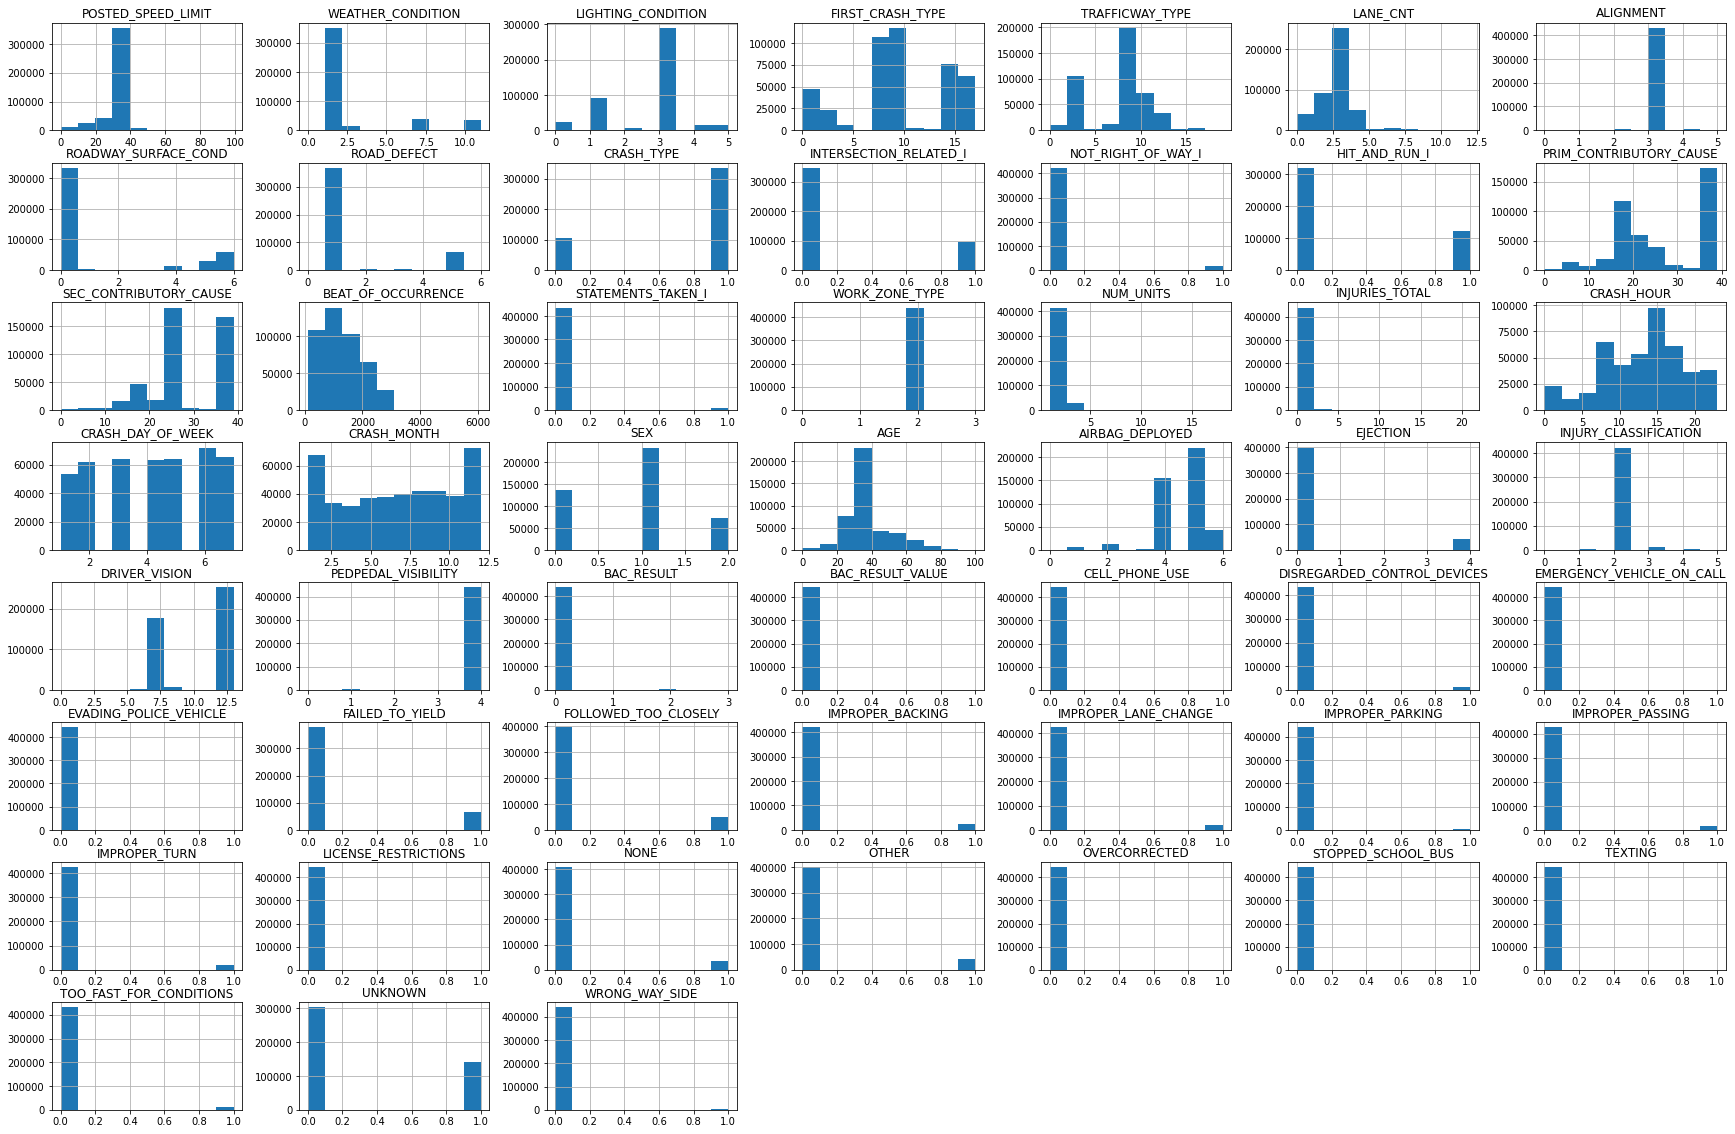

In [45]:
# Histograms 
encode_df.hist(figsize = (30,20))
plt.savefig('Figures/crash_df_hist.png', dpi=300, bbox_inches='tight');

In [ ]:
# num_col = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 
#            'INJURIES_TOTAL', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'AGE','CRASH_MONTH',
#            'BAC_RESULT VALUE']


In [ ]:
feature_col = list(encode_df.select_dtypes(include=['int64','float64']).columns)
feature_col

In [ ]:
target = 'FAILED_TO_YIELD'
for i in range(len(feature_col)):
    plt.figure()
    bar_plot(target, feature_col[i], encode_df)
    # Show/save figure as desired.
    plt.show();

In [ ]:
target = 'FAILED_TO_YIELD'
# scatter plots against crash type
for i in range(len(feature_col)):
    plt.figure()
    scatter_plot(target, feature_col[i], encode_df)
    # Show/save figure as desired.
    plt.show();

In [46]:
# Selecting the columns with only "FAILED_TO_YEILD" crashes
fail_yield = crash_df[crash_df['DRIVER_ACTION'] == 'FAILED TO YIELD']
fail_yield.CRASH_HOUR.value_counts().index
fail_yield.FIRST_CRASH_TYPE.value_counts().index

Index(['ANGLE', 'TURNING', 'SIDESWIPE SAME DIRECTION', 'REAR END',
       'PEDESTRIAN', 'PARKED MOTOR VEHICLE', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'HEAD ON', 'FIXED OBJECT',
       'REAR TO SIDE', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO REAR',
       'ANIMAL', 'OTHER NONCOLLISION', 'OVERTURNED', 'TRAIN'],
      dtype='object')

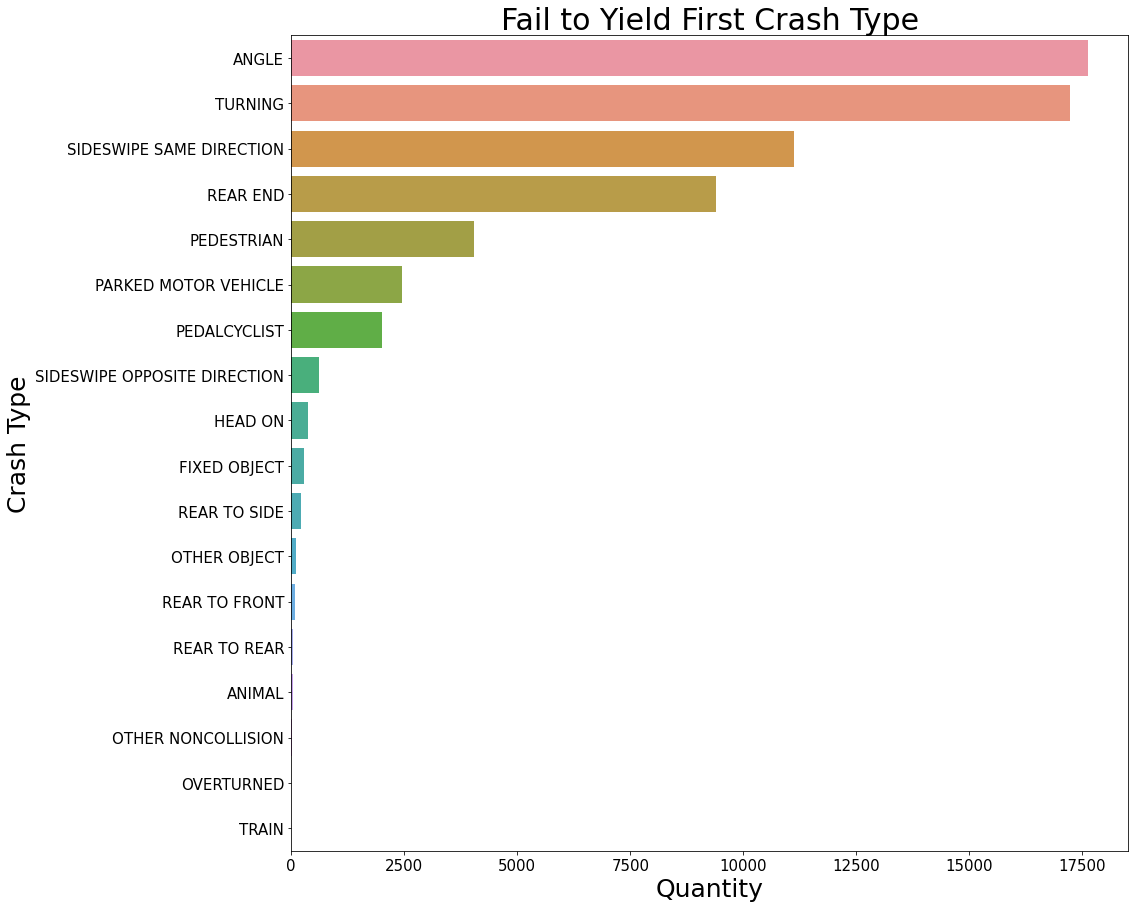

In [47]:
# Bar graph of the Crash Type

plt.figure(figsize=(15,15))

y= fail_yield.FIRST_CRASH_TYPE.value_counts().values
x=fail_yield.FIRST_CRASH_TYPE.value_counts().index

sns.barplot(y, x)
plt.title('Fail to Yield First Crash Type', size=30)
plt.ylabel("Crash Type", size=25, rotation=90)
plt.xlabel("Quantity", size=25)
plt.xticks(size=15)
plt.yticks(size=15)

plt.savefig('Figures/Fail_yield_first_crash.png', dpi=300, bbox_inches='tight');

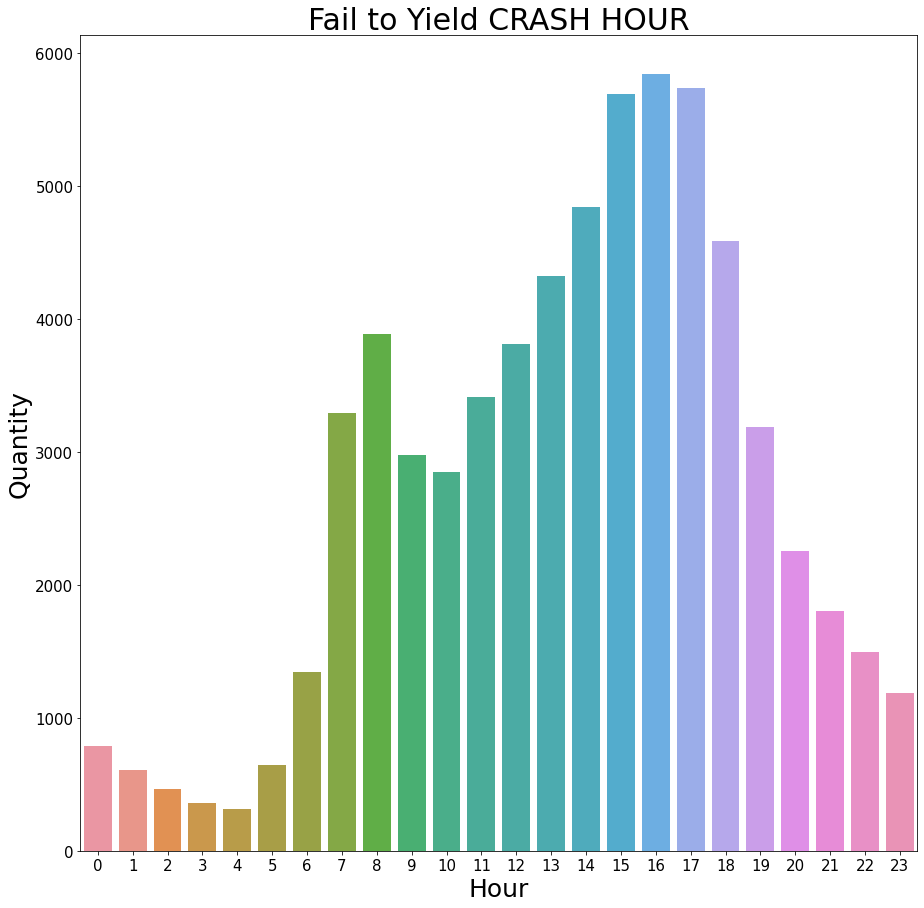

In [48]:
# Bar graph of the Crash Type

plt.figure(figsize=(15,15))

x= fail_yield.CRASH_HOUR.value_counts().values
y=fail_yield.CRASH_HOUR.value_counts().index

sns.barplot(y, x)
plt.title('Fail to Yield CRASH HOUR', size=30)
plt.ylabel("Quantity", size=25, rotation=90)
plt.xlabel("Hour", size=25)
plt.xticks(size=15)
plt.yticks(size=15)

plt.savefig('Figures/Fail_yield_crash_hour.png', dpi=300, bbox_inches='tight');

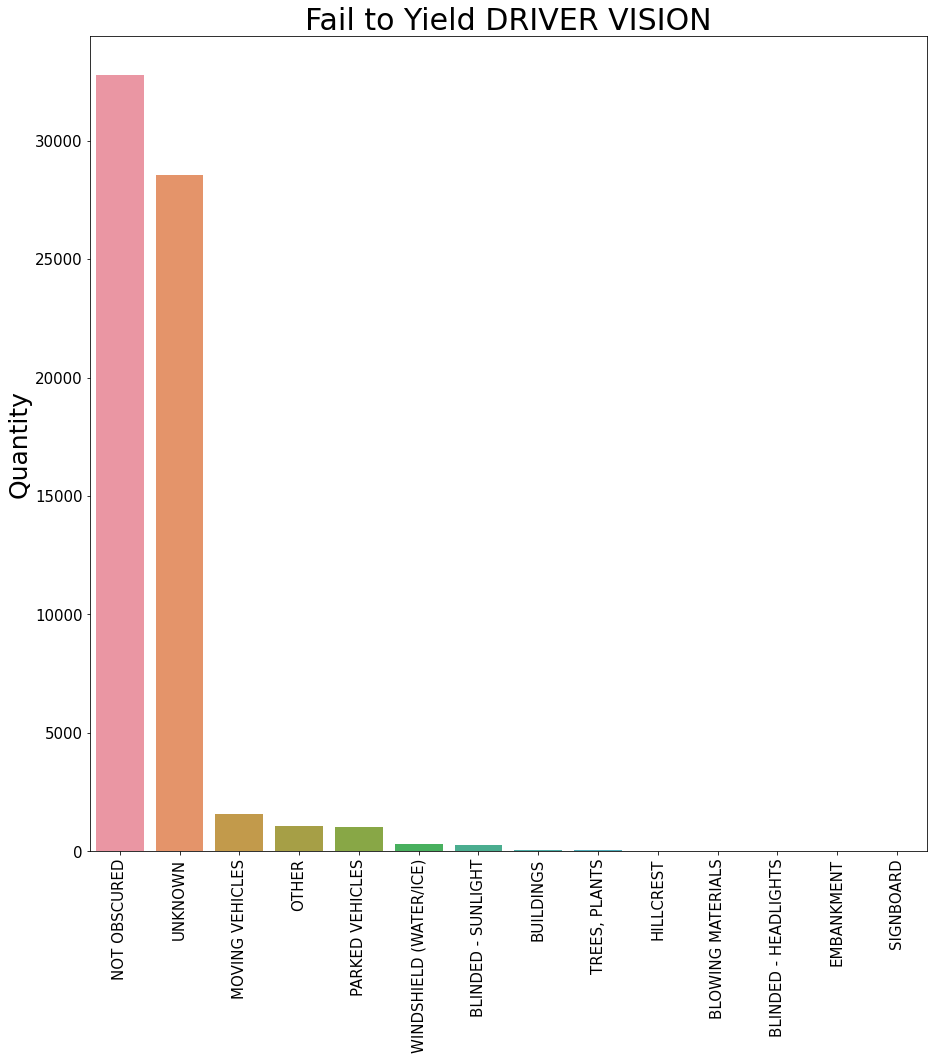

In [49]:
# Bar graph of the Crash Type

plt.figure(figsize=(15,15))

x= fail_yield.DRIVER_VISION.value_counts().values
y=fail_yield.DRIVER_VISION.value_counts().index

sns.barplot(y, x)
plt.title('Fail to Yield DRIVER VISION', size=30)
plt.ylabel("Quantity", size=25, rotation=90)
plt.xlabel("", size=25)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)

plt.savefig('Figures/Fail_yield_driver_vision.png', dpi=300, bbox_inches='tight');

## Models for Target: FAILED TO YIELD

In [50]:
import time

In [51]:
# set target and check make up
target = encode_df['FAILED_TO_YIELD']
target.value_counts()

0    377080
1     65686
Name: FAILED_TO_YIELD, dtype: int64

#### Functions

In [52]:
# Function to print scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
def print_metrics(labels, preds, time):
    """input (labels, preds) and prints Precision score, Recall score,
    Accuracy score, F1 score, and Confusion matrix"""
    print("Precision Score: {}".format(precision_score(labels, preds, average=None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average=None)))
    print("Confision Matrix: \n{}".format(confusion_matrix(labels, preds)))
    print("\n Run Time: {}".format(time))

In [53]:
def print_tree(dt, feature_name, save_file):
    """function to print and save the Decision Tree printout"""
    dot_data = tree.export_graphviz(dt, 
                  feature_names=feature_name,    
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
            
    graph = graphviz.Source(dot_data)

    graph.format = "png"
    graph.render(f'figures/{save_file}')
    return graph.view()

In [54]:
def plot_feature_importances(model):
    """Plots feature importance"""
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#### Train Test Split and scaling

In [55]:
driver_action = ['DISREGARDED_CONTROL_DEVICES', 'EMERGENCY_VEHICLE_ON_CALL',
                 'EVADING_POLICE_VEHICLE', 'FAILED_TO_YIELD', 'FOLLOWED_TOO_CLOSELY', 
                 'IMPROPER_BACKING', 'IMPROPER_LANE_CHANGE', 'IMPROPER_PARKING', 
                 'IMPROPER_PASSING', 'IMPROPER_TURN', 'LICENSE_RESTRICTIONS', 
                 'OVERCORRECTED', 'STOPPED_SCHOOL_BUS', 'UNKNOWN', 'NONE', 'OTHER',
                 'TEXTING', 'TOO_FAST_FOR_CONDITIONS', 'WRONG_WAY_SIDE', 
                 'PRIM_CONTRIBUTORY_CAUSE']

In [56]:
target = encode_df['FAILED_TO_YIELD'].astype(int)

# drop target from df
X = encode_df.drop(columns=driver_action, axis=1)


In [57]:
# # Train Test Split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, 
                                                    random_state=42)


In [58]:
# Check
X_train

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,PEDPEDAL_VISIBILITY,BAC_RESULT,BAC_RESULT_VALUE,CELL_PHONE_USE
207432,30,2,3,10,2,2.491601,3,0,1,1,...,1,64.000000,5,0,2,7,4,0,0.0,0
964398,30,2,3,17,8,2.491601,3,0,1,0,...,1,41.000000,5,0,2,7,4,0,0.0,0
603029,30,2,3,0,8,2.491601,3,0,1,1,...,1,54.000000,6,0,2,12,4,0,0.0,0
113318,30,2,3,15,10,2.491601,3,0,5,1,...,0,39.179463,4,0,2,12,4,0,0.0,0
460035,30,2,1,9,3,4.000000,3,6,1,0,...,2,39.179463,4,0,2,12,4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576537,30,2,0,17,8,2.000000,3,0,5,0,...,0,22.000000,5,0,2,12,4,0,0.0,0
812560,30,2,3,15,2,2.000000,3,0,1,1,...,1,57.000000,5,0,2,7,4,0,0.0,0
294595,30,2,3,17,2,2.491601,3,0,1,1,...,0,29.000000,5,0,2,7,4,0,0.0,0
327794,30,2,3,15,8,2.491601,3,0,1,1,...,0,39.179463,5,0,2,12,4,0,0.0,0


In [59]:
# Use StandardScaler to scale data
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,PEDPEDAL_VISIBILITY,BAC_RESULT,BAC_RESULT_VALUE,CELL_PHONE_USE
0,0.262406,-0.453555,0.433266,0.084556,-1.472440,0.000604,-0.026876,-0.556369,-0.435131,0.563112,...,0.212338,1.925837,0.462556,-0.326577,-0.156032,-1.141169,0.093811,-0.119568,-0.044009,-0.036259
1,0.262406,-0.453555,0.433266,1.426900,0.230250,0.000604,-0.026876,-0.556369,-0.435131,-1.775845,...,0.212338,0.141517,0.462556,-0.326577,-0.156032,-1.141169,0.093811,-0.119568,-0.044009,-0.036259
2,0.262406,-0.453555,0.433266,-1.833079,0.230250,0.000604,-0.026876,-0.556369,-0.435131,0.563112,...,0.212338,1.150046,1.559954,-0.326577,-0.156032,0.856287,0.093811,-0.119568,-0.044009,-0.036259
3,0.262406,-0.453555,0.433266,1.043373,0.797814,0.000604,-0.026876,-0.556369,2.340950,0.563112,...,-1.276420,0.000282,-0.634842,-0.326577,-0.156032,0.856287,0.093811,-0.119568,-0.044009,-0.036259
4,0.262406,-0.453555,-1.357432,-0.107208,-1.188658,1.578908,-0.026876,2.014623,-0.435131,-1.775845,...,1.701097,0.000282,-0.634842,-0.326577,-0.156032,0.856287,0.093811,-0.119568,-0.044009,-0.036259


### Dummy Classifier

In [60]:
# generates random predictions by respecting the training set class distribution.
from sklearn.dummy import DummyClassifier

In [61]:
start = time.time()

# Instantiate 
clf = DummyClassifier(strategy='stratified', random_state=0)

# Fit the Classifier
clf.fit(X_train, y_train)
DummyClassifier(random_state=0, strategy='stratified')
clf.score(X_test, y_test)

# Predict on the test set
y_preds = clf.predict(X_test)

end = time.time()
dum_n = end - start
print(f'time: {dum_n}')

time: 0.04947400093078613


In [62]:
print_metrics(y_test, y_preds, dum_n)

Precision Score: [0.85073978 0.15072835]
Recall Score: [0.85199584 0.14946211]
Accuracy Score: 0.7469826184367434
F1 Score: [0.85136734 0.15009256]
Confision Matrix: 
[[80212 13934]
 [14073  2473]]

 Run Time: 0.04947400093078613


### Decision Tree

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz

In [64]:
start = time.time()

# Train a Decesion Tree
dt_model = DecisionTreeClassifier(random_state=10, max_depth=5)  
dt_model.fit(X_train, y_train) 

# Make predictions for test data
y_pred = dt_model.predict(X_test)

end = time.time()
dt_n = end - start
dt_n

1.385653018951416

In [65]:
print_metrics(y_test, y_pred, dt_n) 

Precision Score: [0.8579048  0.56160164]
Recall Score: [0.99092898 0.0661187 ]
Accuracy Score: 0.8526903479926282
F1 Score: [0.91963133 0.11830864]
Confision Matrix: 
[[93292   854]
 [15452  1094]]

 Run Time: 1.385653018951416


In [66]:
print_tree(dt_model, X.columns.tolist(), 'dt_printout')

'figures/dt_printout.png'

### Feature Importance

In [67]:
dt_model.feature_importances_

array([1.74584837e-03, 0.00000000e+00, 4.31729512e-03, 8.50872489e-01,
       1.77529918e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.21188942e-02, 6.99413892e-03, 0.00000000e+00,
       0.00000000e+00, 3.04665889e-02, 7.64858703e-03, 0.00000000e+00,
       0.00000000e+00, 5.55573228e-04, 2.13482389e-04, 2.76434026e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.95191821e-04, 0.00000000e+00, 3.98059753e-02,
       2.39486038e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

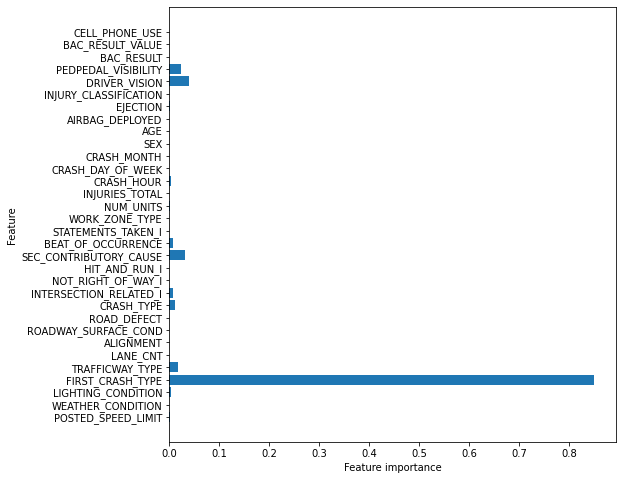

In [68]:
plot_feature_importances(dt_model)

### Bagged Tree

In [69]:
from sklearn.ensemble import BaggingClassifier

In [70]:
start = time.time()

# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini'), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(X_train, y_train)

# Make predictions for test data
bag_pred = bagged_tree.predict(X_test)

end = time.time()
bag_n = end - start
bag_n

87.61605095863342

In [71]:
print_metrics(bag_pred, y_test, bag_n)

Precision Score: [0.96723175 0.220718  ]
Recall Score: [0.87596556 0.54208104]
Accuracy Score: 0.855644491020128
F1 Score: [0.91933912 0.31370528]
Confision Matrix: 
[[91061 12894]
 [ 3085  3652]]

 Run Time: 87.61605095863342


### Random Forrest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
start = time.time()

# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# Make predictions for test data
forest_pred = forest.predict(X_test)

end = time.time()
forest_n = end - start
forest_n

96.95840001106262

In [74]:
print_metrics(forest_pred, y_test, forest_n)

Precision Score: [0.982559   0.17121963]
Recall Score: [0.87089637 0.63307263]
Accuracy Score: 0.8612817547790265
F1 Score: [0.92336409 0.26953998]
Confision Matrix: 
[[92504 13713]
 [ 1642  2833]]

 Run Time: 96.95840001106262


### Pipeline

In [75]:
from sklearn.pipeline import Pipeline

In [76]:
# Build a pipeline with StandardScaler and RandomForsestClassifier
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('RFC', RandomForestClassifier(random_state=42))])

In [77]:
start = time.time()

# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
scaled_pipeline_1.score(X_test, y_test)

# Make predictions for test data
pipline_pred = scaled_pipeline_1.predict(X_test)

end = time.time()
pipe_n = end - start
pipe_n

94.63700413703918

In [78]:
print_metrics(pipline_pred, y_test, pipe_n)

Precision Score: [0.98266522 0.17363713]
Recall Score: [0.87123659 0.63773585]
Accuracy Score: 0.8617334586058613
F1 Score: [0.9236022  0.27295615]
Confision Matrix: 
[[92514 13673]
 [ 1632  2873]]

 Run Time: 94.63700413703918


### SGD Classifier

In [79]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
start = time.time()

# Fit the training data to pipeline
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)

# Print the accuracy on test set
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

# Make predictions for test data
sgd_pred = clf.predict(X_test)

end = time.time()
sgd_n = end - start
sgd_n

In [ ]:
print_metrics(sgd_pred, y_test, sgd_n)

## Recommendations

In driver education classes:
- Focus more on the importance of yielding especially when turning, changing lanes, and with pedestrians present

- Rush hour when everyone is in a rush to get to work/get home is the time to be extra cautious 

For filling in crash reports:
 - Since most of the data is based on the determination of the reporting officer, having universal language would help repetitive data and multiple inputs meaning the same thing. ie the Hospital column having over 25 ways that "Refused Medical Attention" was inputted. 



### Recommended Future Work 

- Examine how other action and causes affect the models
- Add the third linked dataframe covering the cars involved to go more in depth.

- Streamline the data:
 - Research the differences in crashes, causes, etc. Example: not yielding to parked vehicle? 
 - Combine like columns, rows based on the research
 - Binning and cluster data 
- Run other models that take longer to run

